In [1]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.formula.api as sm
import warnings

#這一行表示不希望看到警告訊息
warnings.filterwarnings(action='ignore')

In [2]:
#導入資料集
profit_data=pd.read_excel(r'Predict to Profit.xlsx')

#顯示中文(若資料中有中文)
plt.rcParams['font.sans-serif']=['Microsoft YaHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
profit_data.head()

,RD_Spend,Administration,Marketing_Spend,Salary,uniform,normal,z,value,Profit
0,165349.20,136897.80,471784.10,933.652196,136813,0.777356,12.178899,699.133927,192261.83
1,162597.70,151377.59,443898.53,146.080323,95313,0.893609,12.728685,1917.920600,191792.06
2,153441.51,101145.55,407934.54,168.391072,130567,0.334162,7.591278,545.858257,191050.39
3,144372.41,118671.85,383199.62,836.998986,106374,0.561890,0.973965,1306.442786,182901.99
4,142107.34,91391.77,366168.42,505.350597,146371,0.225552,3.164923,615.510889,166187.94


In [4]:
#進行回歸模型
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

train,test=train_test_split(profit_data,test_size=0.2,random_state=1)
model=sm.formula.ols('Profit ~ RD_Spend+Marketing_Spend+Salary+uniform+normal+z+value',data=train).fit()
print(model.params)

Intercept          39556.222499
RD_Spend               0.773111
Marketing_Spend        0.017708
Salary                 1.671791
uniform                0.082050
normal             -4094.448248
z                   -408.841658
value                  8.784834
dtype: float64


In [5]:
#產生線性回歸
linear_model = sm.formula.ols(formula='Profit~RD_Spend+Administration+Marketing_Spend+Salary+uniform+z+value',data=profit_data).fit()
print(linear_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     193.0
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.70e-29
Time:                        11:19:39   Log-Likelihood:                -499.60
No. Observations:                  49   AIC:                             1015.
Df Residuals:                      41   BIC:                             1030.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.486e+04   7305.404     

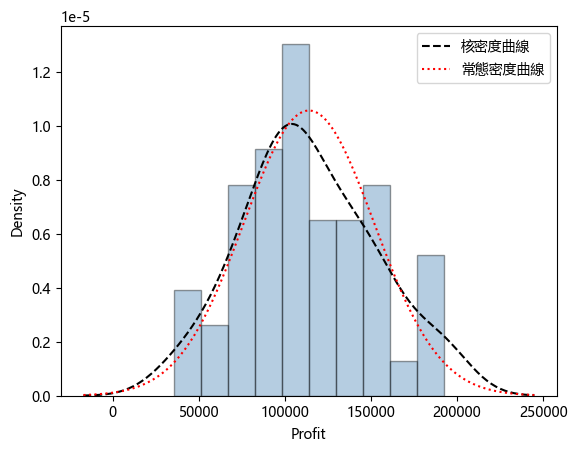

In [6]:
#繪製直方圖 (Profit)
#兩條線越密合越好
sns.distplot(a=profit_data.Profit,bins=10,fit=stats.norm,norm_hist=True,
             hist_kws={'color':'steelblue','edgecolor':'black'},
             kde_kws={'color':'black','linestyle':'--','label':'核密度曲線'},
             fit_kws={'color':'red','linestyle':':','label':'常態密度曲線'})
plt.legend()
plt.show()

In [7]:
#H0:資料符合常態分配
from scipy import stats
stats.shapiro(profit_data)

ShapiroResult(statistic=0.7918477654457092, pvalue=2.4072443932504714e-23)

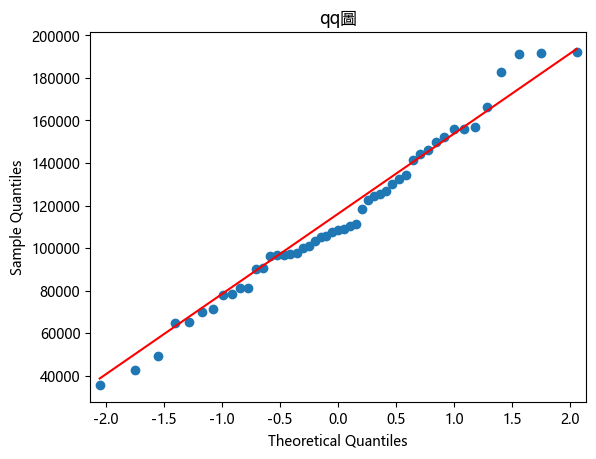

In [8]:
#QQ圖(應變數Profit)
#若非常態可用邏輯斯回歸
import statsmodels.api as sm

qq_plot=sm.ProbPlot(profit_data.Profit)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

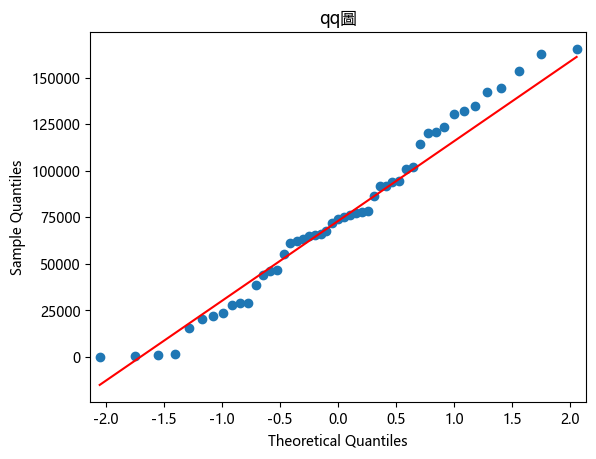

In [9]:
#QQ圖 (自變數RD_Spend)
import statsmodels.api as sm

qq_plot=sm.ProbPlot(profit_data.RD_Spend)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

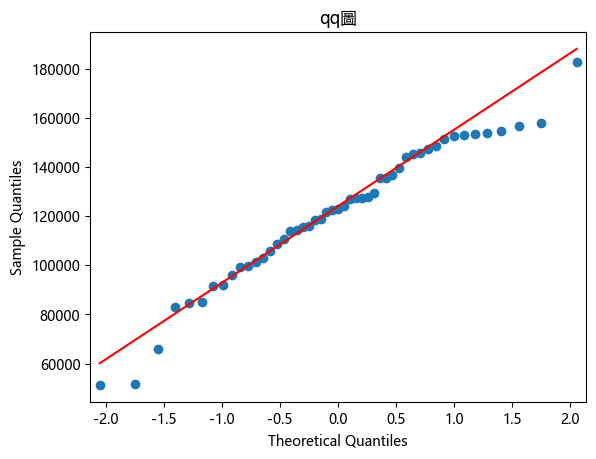

In [10]:
#QQ圖 (自變數Administration)

qq_plot=sm.ProbPlot(profit_data.Administration)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

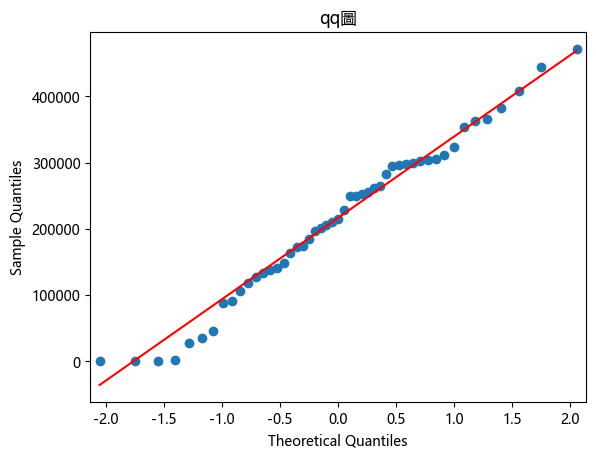

In [11]:
#QQ圖 (自變數Marketing_Spend)

qq_plot=sm.ProbPlot(profit_data.Marketing_Spend)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

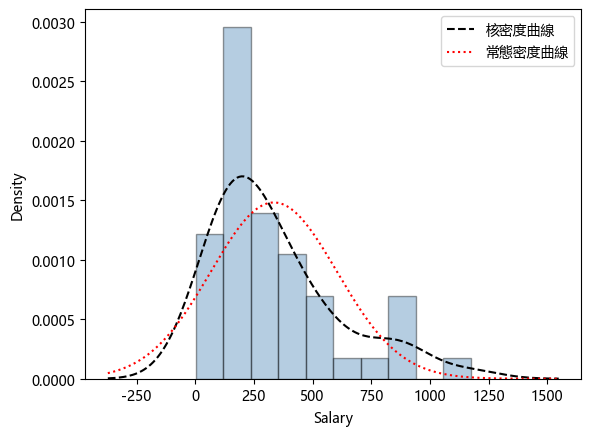

In [12]:
#繪製直方圖 (自變數Salary)

sns.distplot(a=profit_data.Salary,bins=10,fit=stats.norm,norm_hist=True,
             hist_kws={'color':'steelblue','edgecolor':'black'},
             kde_kws={'color':'black','linestyle':'--','label':'核密度曲線'},
             fit_kws={'color':'red','linestyle':':','label':'常態密度曲線'})
plt.legend()
plt.show()

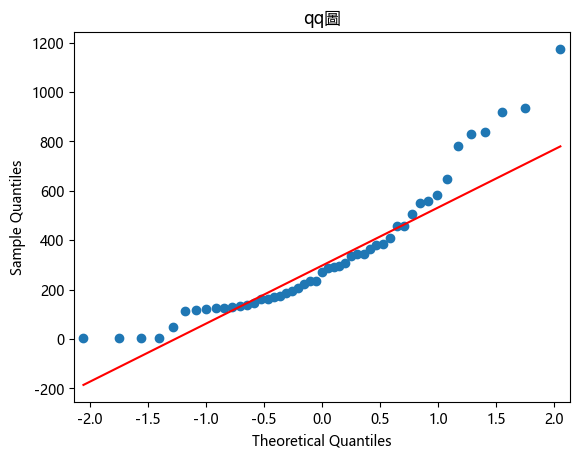

In [13]:
#QQ圖 (自變數Salary)

qq_plot=sm.ProbPlot(profit_data.Salary)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

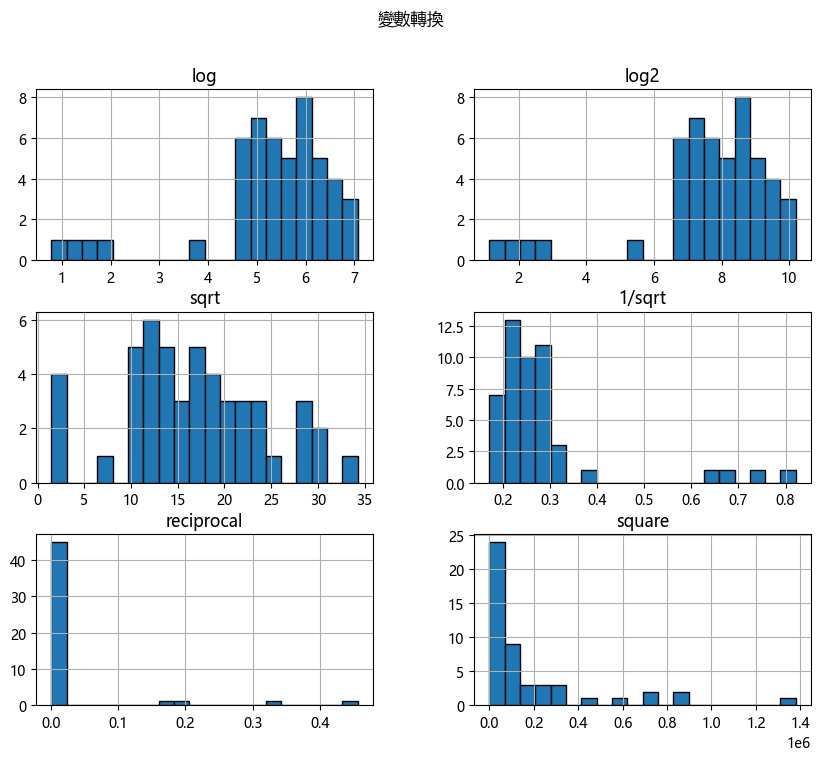

In [14]:
#自變數變換Salary
salary_tr=pd.DataFrame()
salary_tr['log']=np.log(profit_data['Salary'])
salary_tr['log2']=np.log2(profit_data['Salary'])
salary_tr['sqrt']=np.sqrt(profit_data['Salary'])
salary_tr['1/sqrt']=np.sqrt(profit_data['Salary'])**(-1/2)
salary_tr['reciprocal']=np.reciprocal(profit_data['Salary'])
salary_tr['square']=np.power(profit_data['Salary'],2)

salary_tr.hist(bins=20,layout=(3,2),edgecolor='k',figsize=(10,8))
plt.suptitle('變數轉換')
plt.show()

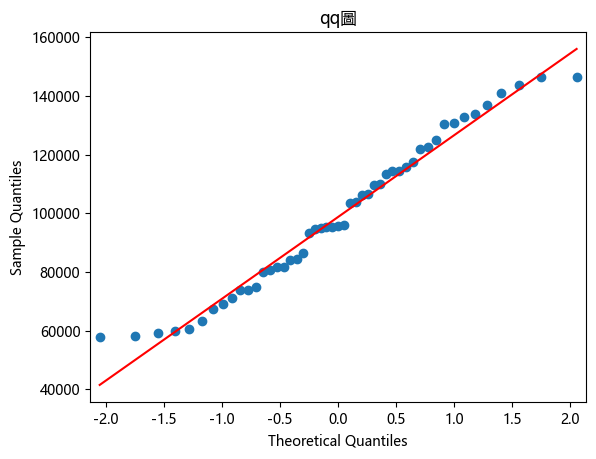

In [15]:
#QQ圖 (自變數uniform)

qq_plot=sm.ProbPlot(profit_data.uniform)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

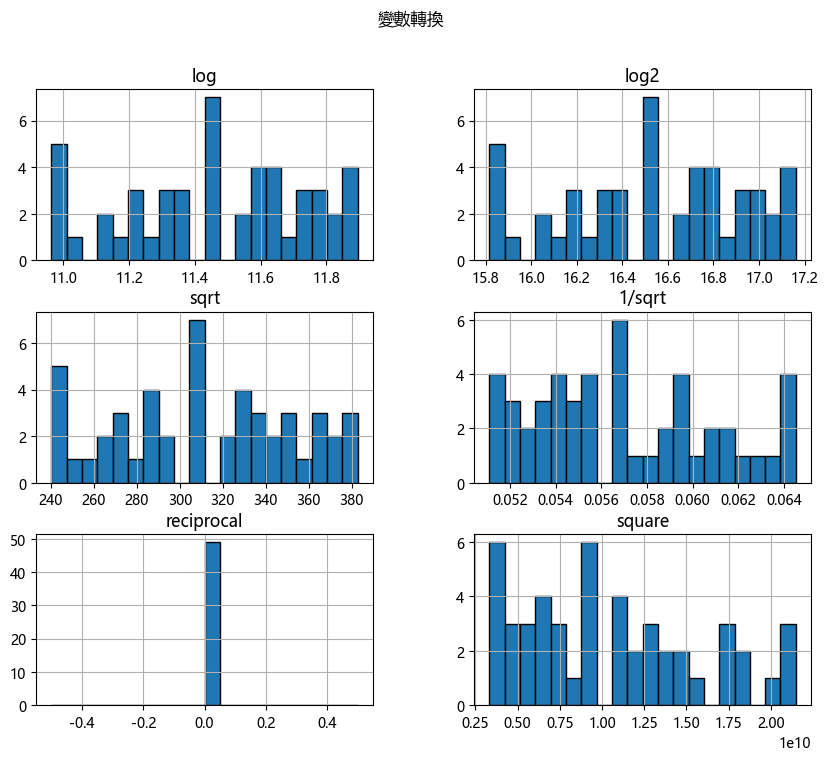

In [16]:
#自變數變換uniform
uniform_tr=pd.DataFrame()
uniform_tr['log']=np.log(profit_data['uniform'])
uniform_tr['log2']=np.log2(profit_data['uniform'])
uniform_tr['sqrt']=np.sqrt(profit_data['uniform'])
uniform_tr['1/sqrt']=np.sqrt(profit_data['uniform'])**(-1/2)
uniform_tr['reciprocal']=np.reciprocal(profit_data['uniform'])
uniform_tr['square']=np.power(profit_data['uniform'],2)

uniform_tr.hist(bins=20,layout=(3,2),edgecolor='k',figsize=(10,8))
plt.suptitle('變數轉換')
plt.show()

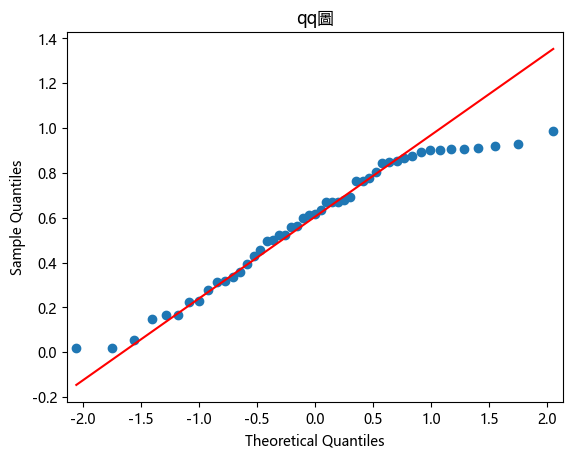

In [17]:
#QQ圖 (自變數normal)

qq_plot=sm.ProbPlot(profit_data.normal)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

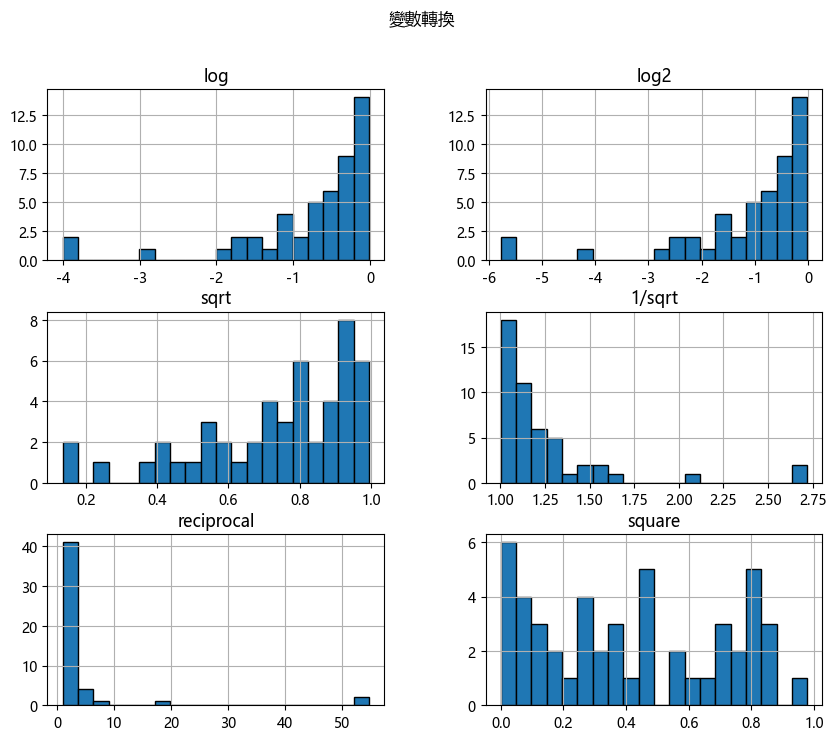

In [18]:
#自變數變換normal
normal_tr=pd.DataFrame()
normal_tr['log']=np.log(profit_data['normal'])
normal_tr['log2']=np.log2(profit_data['normal'])
normal_tr['sqrt']=np.sqrt(profit_data['normal'])
normal_tr['1/sqrt']=np.sqrt(profit_data['normal'])**(-1/2)
normal_tr['reciprocal']=np.reciprocal(profit_data['normal'])
normal_tr['square']=np.power(profit_data['normal'],2)

normal_tr.hist(bins=20,layout=(3,2),edgecolor='k',figsize=(10,8))
plt.suptitle('變數轉換')
plt.show()

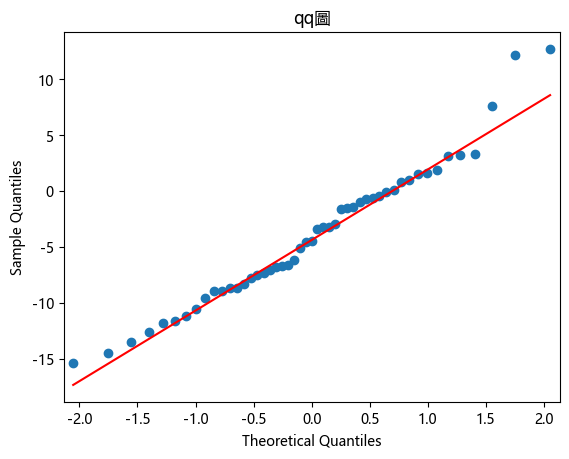

In [19]:
#QQ圖 (自變數z)

qq_plot=sm.ProbPlot(profit_data.z)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

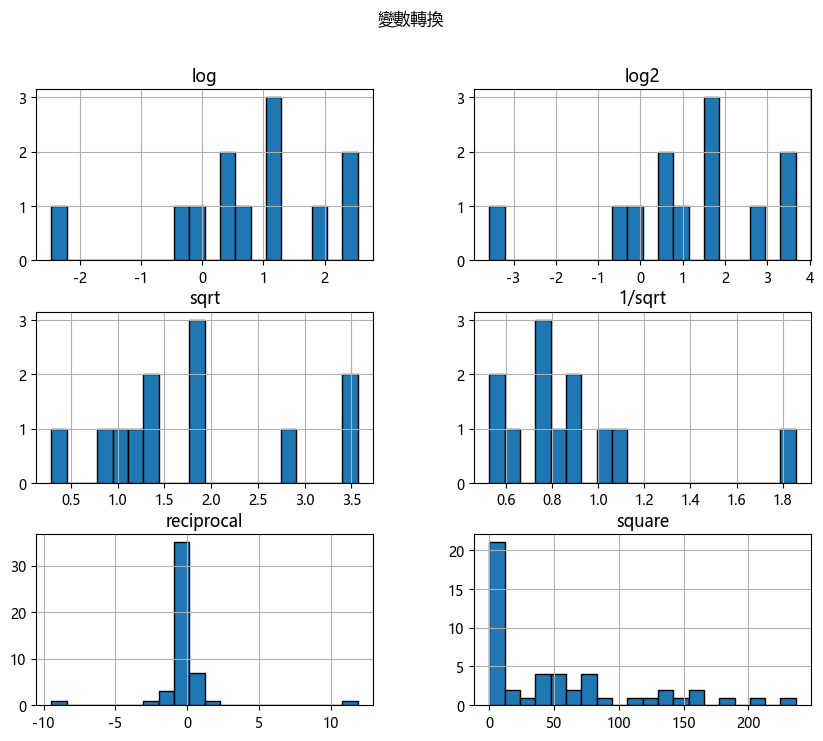

In [20]:
#自變數變換z
z_tr=pd.DataFrame()
z_tr['log']=np.log(profit_data['z'])
z_tr['log2']=np.log2(profit_data['z'])
z_tr['sqrt']=np.sqrt(profit_data['z'])
z_tr['1/sqrt']=np.sqrt(profit_data['z'])**(-1/2)
z_tr['reciprocal']=np.reciprocal(profit_data['z'])
z_tr['square']=np.power(profit_data['z'],2)

z_tr.hist(bins=20,layout=(3,2),edgecolor='k',figsize=(10,8))
plt.suptitle('變數轉換')
plt.show()


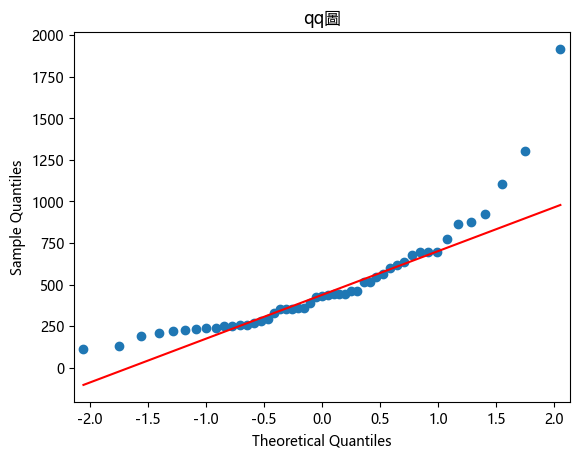

In [21]:
#QQ圖 (自變數value)

qq_plot=sm.ProbPlot(profit_data.value)
qq_plot.qqplot(line='q')
plt.title('qq圖')
plt.show()

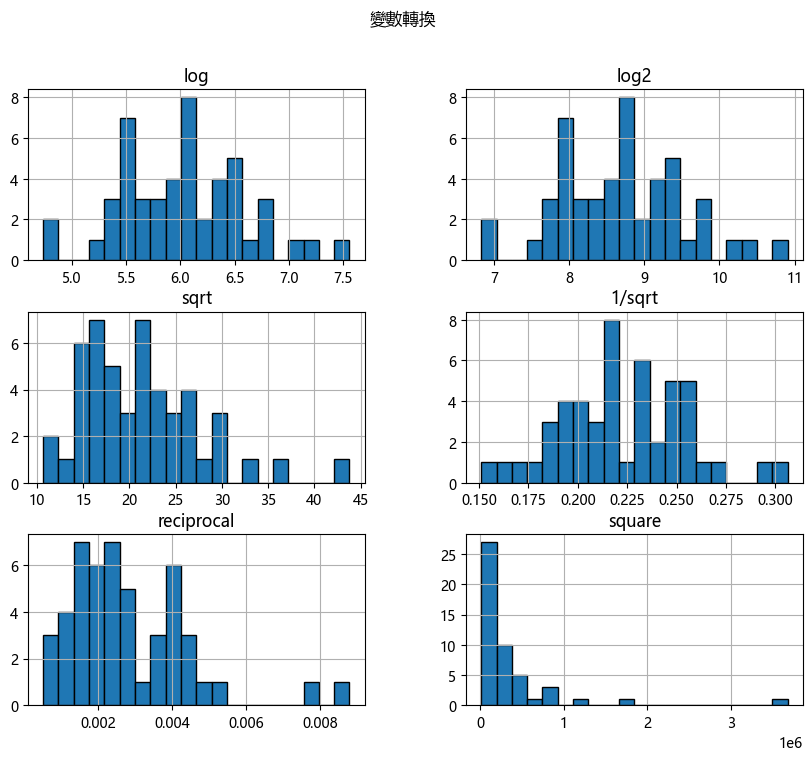

In [22]:
#自變數變換value
value_tr=pd.DataFrame()
value_tr['log']=np.log(profit_data['value'])
value_tr['log2']=np.log2(profit_data['value'])
value_tr['sqrt']=np.sqrt(profit_data['value'])
value_tr['1/sqrt']=np.sqrt(profit_data['value'])**(-1/2)
value_tr['reciprocal']=np.reciprocal(profit_data['value'])
value_tr['square']=np.power(profit_data['value'],2)

value_tr.hist(bins=20,layout=(3,2),edgecolor='k',figsize=(10,8))
plt.suptitle('變數轉換')
plt.show()

In [23]:
value=value_tr['log']

In [24]:
#因為salary、不符合常態假設，因此刪除

In [25]:
#共線性檢定
#若vif>10刪變數(共變數檢定)
from statsmodels.stats.outliers_influence import variance_inflation_factor

#加入自變數RD_Spend,Marketing_Spend和常數1
X=sm.add_constant(profit_data.loc[:,['RD_Spend','Marketing_Spend','Administration','uniform','normal','z','value']])

vif=pd.DataFrame()
vif['features']=X.columns
vif['VIF_Factor']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif
#因為Administration、normal的vif>10，所以刪掉這兩個變數

,features,VIF_Factor
0,const,173.923930
1,RD_Spend,3.952987
2,Marketing_Spend,2.363666
3,Administration,34.475398
4,uniform,1.104141
5,normal,33.993951
6,z,2.602682
7,value,1.442777


In [26]:
#計算應變數與自變數的coefficient_of_association
#選擇較高的coe自變數，ad,uniform,normal太低所以刪掉
coe=profit_data.drop('Profit',axis=1).corrwith(profit_data.Profit)
coe

RD_Spend           0.978437
Administration     0.205841
Marketing_Spend    0.739307
Salary             0.613254
uniform            0.245814
normal             0.181521
z                  0.714645
value              0.536070
dtype: float64

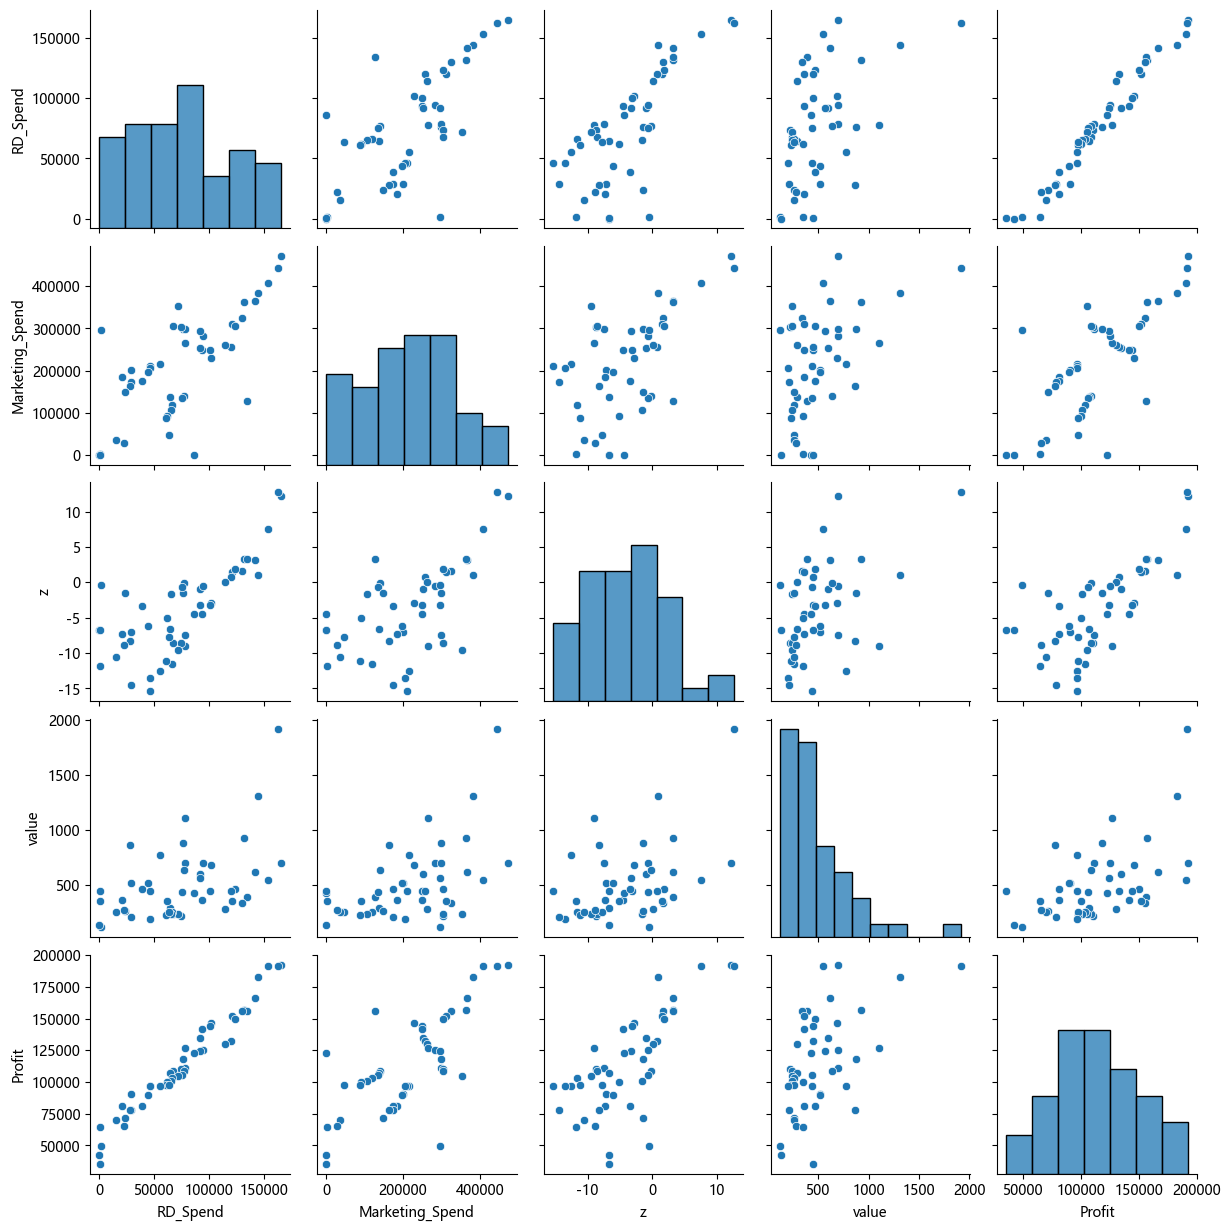

In [27]:
#透過視覺化方式

sns.pairplot(profit_data.loc[:,['RD_Spend','Marketing_Spend','z','value','Profit']])
plt.show()

In [28]:
#進行回歸模型
from sklearn.model_selection import train_test_split

train,test=train_test_split(profit_data,test_size=0.2,random_state=1)
model=sm.formula.ols('Profit ~ RD_Spend+Marketing_Spend+z+value',data=train).fit()
print(model.params)

Intercept          45068.941571
RD_Spend               0.774972
Marketing_Spend        0.022572
z                   -388.565215
value                  8.184335
dtype: float64


In [29]:
#Profit=51478.3+0.75RD_Spend+0.02Marketing_Spend

In [30]:
#OLS最小平方法
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     235.6
Date:                Fri, 25 Nov 2022   Prob (F-statistic):           2.83e-24
Time:                        11:19:48   Log-Likelihood:                -397.51
No. Observations:                  39   AIC:                             805.0
Df Residuals:                      34   BIC:                             813.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.507e+04   4917.288      9.165      0.000    3.51e+04    5.51e+04
RD_Spend            0.7750      0.044     17.497      0.000       0.685       0.865
Marketing_Spend     0.0226      0.014      1.642      0.110      -0.005       0.051
z                -388.5652    296.197     -1.312      0.198    -990.510     213.379
value               8.1843      4.029      2.031      0.050      -0.004      16.372
==============================================================================
Omnibus:                        0.225   Durbin-Watson:                   2.235
Prob(Omnibus):                  0.893   Jarque-Bera (JB):                0.354
Skew:                           0.159   Prob(JB):                        0.838
Kurtosis:                       2.658   Cond. No.                     1.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#預測值
pred=model.predict(test)
pred

27    114575.766793
34     95379.480587
39     84003.978621
48     51743.447558
2     174707.362828
3     175916.892106
42     69429.191409
29    100848.231684
45     53335.983937
30    100020.051730
dtype: float64

In [32]:
#實際值
test.Profit

27    105008.31
34     96712.80
39     81005.76
48     35673.41
2     191050.39
3     182901.99
42     71498.49
29    101004.64
45     64926.08
30     99937.59
Name: Profit, dtype: float64

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(test.Profit, pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(test.Profit, pred))
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(test.Profit, pred))

Root mean squared error: 9028.17
Mean absolute error: 6719.54
Mean absolute percentage error: 0.09


# 增加模型複雜度

In [44]:
#可嘗試增加擬合，但只能針對X之間進行調整，不能用常數調整
#相乘
profit_data['zvalue']=profit_data['z']*profit_data['value']

#平方
profit_data['value_2']=profit_data['value']**(2)
profit_data['z_2']=profit_data['z']**(2)

#次方
profit_data['z_3']=profit_data['z']**(3)
profit_data['value_3']=profit_data['value']**(3)

profit_data.head()

,RD_Spend,Administration,Marketing_Spend,Salary,uniform,normal,z,value,Profit,zvalue,value_2,z_3,z_2,value_3
0,165349.20,136897.80,471784.10,933.652196,136813,0.777356,12.178899,699.133927,192261.83,8514.681767,4.887882e+05,1806.442446,148.325591,3.417284e+08
1,162597.70,151377.59,443898.53,146.080323,95313,0.893609,12.728685,1917.920600,191792.06,24412.607119,3.678419e+06,2062.294171,162.019421,7.054916e+09
2,153441.51,101145.55,407934.54,168.391072,130567,0.334162,7.591278,545.858257,191050.39,4143.761876,2.979612e+05,437.466417,57.627504,1.626446e+08
3,144372.41,118671.85,383199.62,836.998986,106374,0.561890,0.973965,1306.442786,182901.99,1272.430193,1.706793e+06,0.923912,0.948609,2.229827e+09
4,142107.34,91391.77,366168.42,505.350597,146371,0.225552,3.164923,615.510889,166187.94,1948.044763,3.788537e+05,31.702213,10.016740,2.331885e+08


In [54]:
train,test=train_test_split(profit_data,test_size=0.3,random_state=50)
model=sm.formula.ols('Profit ~ RD_Spend+Marketing_Spend+z+value+z_2',data=train).fit()
pred=model.predict(test)
print(model.params)

Intercept          44135.702453
RD_Spend               0.770746
Marketing_Spend        0.013173
z                    183.908105
value                 12.810708
z_2                   46.406062
dtype: float64


In [55]:
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(test.Profit, pred)))
print("Mean absolute error: %.2f" % mean_absolute_error(test.Profit, pred))
print("Mean absolute percentage error: %.2f" % mean_absolute_percentage_error(test.Profit, pred))

Root mean squared error: 8481.97
Mean absolute error: 6512.31
Mean absolute percentage error: 0.05
